# Lesson 19 - Plotting with Matplotlib

### The following topics are discussed in this notebook:
* Scatter plots
* Line plots
* Bar charts
* Histograms

## Matplotlib

Matplotlib is a package for creating data visualizations. It provides tools for creating a wide range of plots, and allows for a high level of customization. 

Python has two distint interfaces than can be used to generate plots. We will primarily by working with the `pyplot` API (Application Programming Interface). By convention, this is typically imported under the alias `plt`, as in the cell below.

In [2]:
import matplotlib.pyplot as plt

## Import Gapminder Data 

For some of the examples in this lesson, we will be working with the gapminder dataset. This dataset contains socioeconomic data for 184 countries over a period of 219 years, from 1800 to 2018. The data you will be working with is contained in the file `gapminder_data.txt`. Please download this file into the same folder that contains this notebook. 

In the cell below, we use a package called Pandas to import the data. The data is stored in a pandas data type called a `DataFrame`. DataFrames are used to contain tabular data arranged in rows and columns. 

After importinng the data, we select only the records from 2018. Then to get a sense as to what this dataset looks like, we display the first 10 rows of the filtered dataframe. Don't worry about figuring out how this code works just yet. We will cover pandas in detail in a later lesson. 

In [3]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
df = df.loc[df.year == 2018,:].reset_index(drop=True)
df.head(10)

,country,year,continent,population,life_exp,gdp_per_cap,gini
0,Afghanistan,2018,asia,36400000,58.7,1870,36.8
1,Albania,2018,europe,2930000,78.0,12400,29.0
2,Algeria,2018,africa,42000000,77.9,13700,27.6
3,Angola,2018,africa,30800000,65.2,5850,42.6
4,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
5,Argentina,2018,americas,44700000,77.0,18900,42.4
6,Armenia,2018,europe,2930000,76.0,8660,32.6
7,Australia,2018,asia,24800000,82.9,45800,32.3
8,Austria,2018,europe,8750000,81.8,44600,30.5
9,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


Since we do not yet know how to work with DataFrames, we will convert each column of the DataFrame into its own list. In the cell below, we create the following lists: `country`, `continent`, `population`, `life_exp`, `pcgdp`, and `gini`.

In [4]:
country = list(df.country)
continent = list(df.continent)
population = list(df.population)
life_exp = list(df.life_exp)
pcgdp = list(df.gdp_per_cap)
gini = list(df.gini)

The numbers on the left of the displayed DataFrame above are row numbers. Data that was originally stored in row `N` of the DataFrame will now be split across the lists we created, but each value will be stored at index `N` of the relevant list. Let's confirm this by printing the element at index 7 in each list. We can see from the DataFrame above that these values will be for Australia. 

In [5]:
N = 7
print('Country:         ', country[N])
print('Continent:       ', continent[N])
print('Population:      ', population[N])
print('Life Expectancy: ', life_exp[N])
print('Per Capita GDP:  ', pcgdp[N])
print('Gini Index:      ', gini[N])

Country:          Australia
Continent:        asia
Population:       24800000
Life Expectancy:  82.9
Per Capita GDP:   45800
Gini Index:       32.3


Now that we understand how our data is stored in the lists, let's move on to see how to visually represent aspects of this data set. 

## Scatter Plots

Matplotlib contains a function called `scatter()` that can be used to generate scatter plots. This function has two required parameters named `x` and `y`. These parameters are expected to be lists containing the x and y coordinates of the plots to be pointed. 

Plots in Matplotlib are built up as a series of layers. We create a base plot, and then we can add additional plots on top of that, or add things like titles or axis labels. When we are done creating our plot, we can display it using `plt.show()`.

The cell below creates a simple scatter plot of life expectancy against per capita GDP.

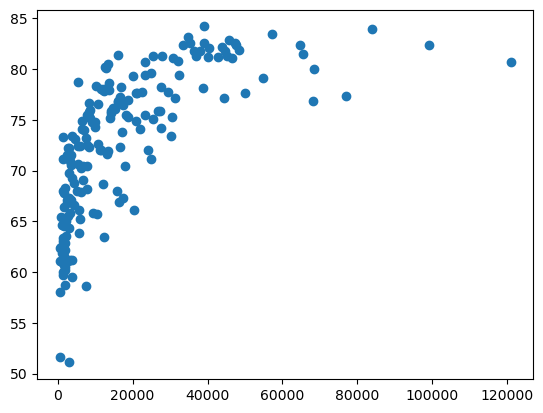

In [6]:
plt.scatter(x=pcgdp, y=life_exp)
plt.show()

## Axis Labels and Title

We can use the `xlabel()`, `ylabel()`, and `title()` functions to add labels to the axes, or a title to the plot. 

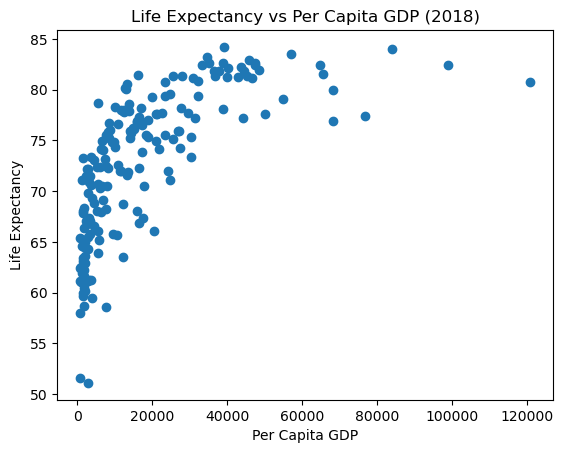

In [7]:
plt.scatter(x=pcgdp, y=life_exp)
plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.show()

## Changing the Figure Size

We can use the `figure()` function to change the size of our plot. We do this by passing in a list of two numbers for the `figsize` parameter. The first number controls the width of the figure while the second number controls the height.

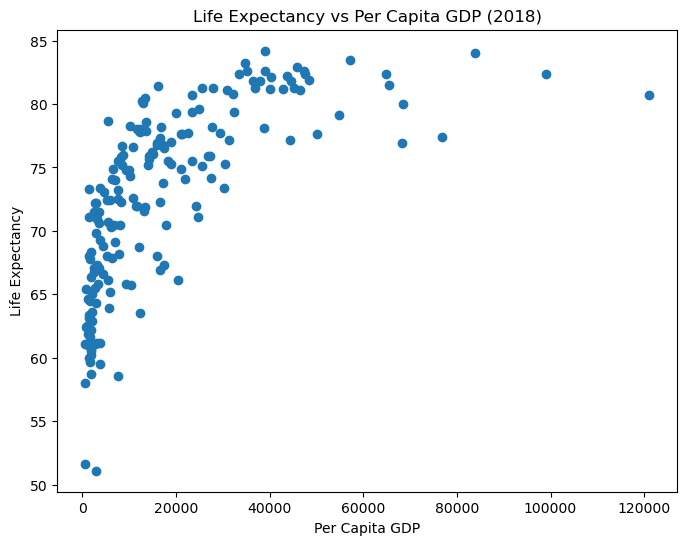

In [8]:
plt.figure(figsize=[8,6])
plt.scatter(x=pcgdp, y=life_exp)
plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.show()

## Setting Point Properties

There are several optional parameters that we can provide to `scatter()` to control how points are displayed. A few common examples are:

* **`s`** - Controls the size of the points. 
* **`color`** - Sets the fill color of the points. 
* **`edgecolor`** - Sets the border color of the points.
* **`alpha`** - Controls the opacity of the points. 

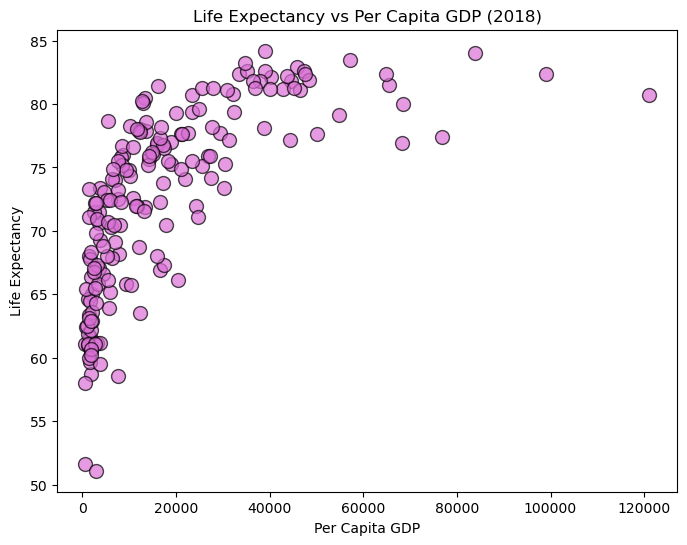

In [9]:
plt.figure(figsize=[8,6])
plt.scatter(x=pcgdp, y=life_exp, s=100, alpha=0.7, 
            color='orchid', edgecolor='black')
plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.show()

Notice that in the cell above, we set the fill color of the points to `'orchid'` and the border color to `'black'`. These are examples of "named colors", or strings that `matplotlib` recognizes as specific colors. You can find a partial list of named colors recognized by `matplotlib` on the following page: [Matplotlib Named Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

## Results by Continent

In the next few example, we will group together countries by their continents. So that we can work with each continent separately, we will create 10 new lists. For each continent, we will create a list containing the per capita GDP for countries in that continent, as well as a list containing the life expectancies for countries in that continent. 

We will use list comprehensions for this task, but the same results could have been obtained with loops. 

**Note:** In the next lesson, we will cover a package called NumPy. As we will see, NumPy provides more convenient tools for the type of list filtering that we are doing in the cell below. 

In [10]:
n = len(country)

africa_pcgdp = [pcgdp[i] for i in range(n) if continent[i] == 'africa']
africa_life_exp = [life_exp[i] for i in range(n) if continent[i] == 'africa']

americas_pcgdp = [pcgdp[i] for i in range(n) if continent[i] == 'americas']
americas_life_exp = [life_exp[i] for i in range(n) if continent[i] == 'americas']

asia_pcgdp = [pcgdp[i] for i in range(n) if continent[i] == 'asia']
asia_life_exp = [life_exp[i] for i in range(n) if continent[i] == 'asia']

europe_pcgdp = [pcgdp[i] for i in range(n) if continent[i] == 'europe']
europe_life_exp = [life_exp[i] for i in range(n) if continent[i] == 'europe']

## Plotting Multiple Sets of Points

We can used multiple `scatter()` functions to plot several different point sets within the same plot. In the plot below, we add the countries to the plot one continent at a time, and will color the points based on the continents. We also add a legend to the plot.

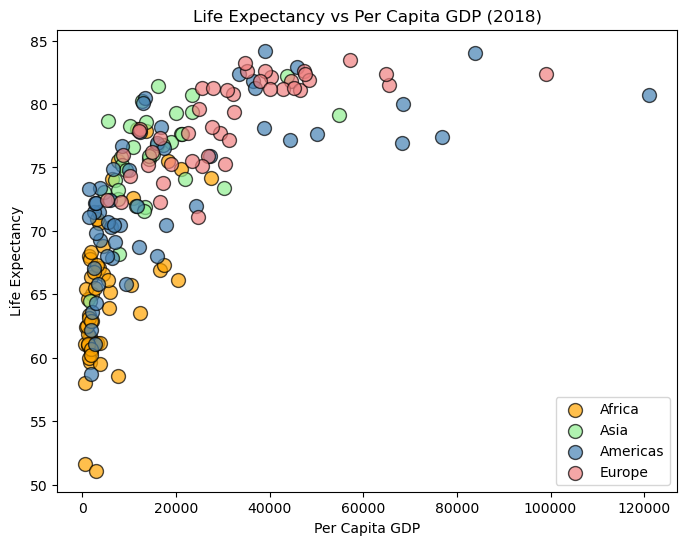

In [13]:
ps = 100
alpha = 0.7
plt.figure(figsize=[8,6])

plt.scatter(x=africa_pcgdp, y=africa_life_exp, s=ps, alpha=alpha,
            color='orange', edgecolor='black', label='Africa')

plt.scatter(x=americas_pcgdp, y=americas_life_exp, s=ps, alpha=alpha,
            color='lightgreen', edgecolor='black', label='Asia')

plt.scatter(x=asia_pcgdp, y=asia_life_exp, s=ps, alpha=alpha,
            color='steelblue', edgecolor='black', label='Americas')

plt.scatter(x=europe_pcgdp, y=europe_life_exp, s=ps, alpha=alpha,
            color='lightcoral', edgecolor='black', label='Europe')

plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()

We can simplify the code used in the previous two code cells by using a loop. The example below combines the steps performed in those two cells. If you are adding several plots to the same figure, it will be more efficient to use loops. Even in our relatively small example, our loop version involves several fewer lines of code. 

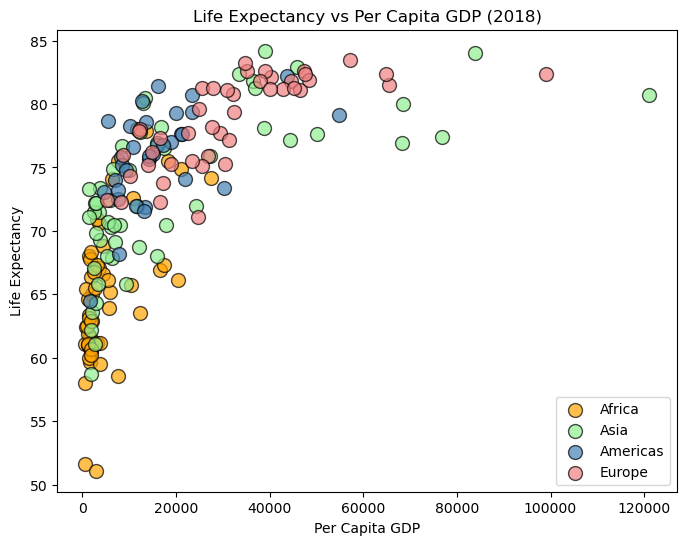

In [14]:
continent_list = ['africa', 'asia', 'americas', 'europe']
color_list = ['orange', 'lightgreen', 'steelblue', 'lightcoral']

plt.figure(figsize=[8,6])

for j in range(0, len(continent_list)):
    
    current_continent = continent_list[j]
    temp_pcgdp = [pcgdp[i] for i in range(n) if continent[i] == current_continent]
    temp_life_exp = [life_exp[i] for i in range(n) if continent[i] == current_continent]
    
    plt.scatter(x=temp_pcgdp, y=temp_life_exp, s=100, alpha=0.7,
                color=color_list[j], edgecolor='black', label=current_continent.title())

plt.xlabel('Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Per Capita GDP (2018)')
plt.legend()
plt.show()

## Subplots

We can use the `subplot()` function from Matplotlib to create a grid of plots. The `subplot` function requires three arguments. The first is the number of rows in the grid, and the second is the number of columns. The third argument is the number of plot that we are currently creating, with the first plot being numbered as 1 (as opposed to 0).

In the cell below, we use a loop to create a figure containing six subplots arranged in a 2x3 grid. We add a scatterplot of `life_exp` against `pcgdp` in each subplot, although you will generally be displaying different plots in each subplot. To help you understand how the plots are numbered, we have also used `plt.text()` to add a number to each plot. 

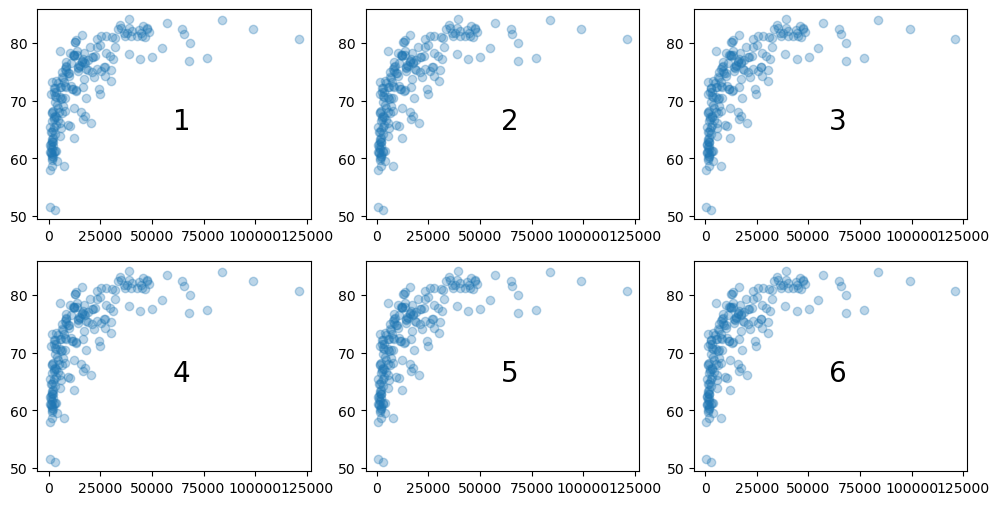

In [15]:
plt.figure(figsize=[12,6])

for i in range(1,7):
    
    plt.subplot(2,3,i)

    plt.scatter(x=pcgdp, y=life_exp, alpha=0.3)
    plt.text(x=60000, y=65, s=str(i), fontsize=20 )

plt.show()

In the figure below, we create a grid of four scatter plots with each subplot displaying the points corresponding to countries in one of the four continental regions. You should compare this code with the code we used to create the previous scatter plot in which we assigned a different color to each of the continental regions. The changes we have made are as follows:

* We have added a call to `plt.subplot()` as the first line of the loop. Note that the third argument is `i+1` so that the values for this argument range from 1 to 4. 
* We changed the figure so that individual plots would not be cramped. 
* The calls to `xlabel()`, `ylabel()`, and `title()` have been moved into loop so that each subplot will get these elements. 
* We have removed the legend and are instead using the titles of the subplots to indicate which continental region is represented in each plot. 
* By default, matplotlib will automatically select axis limits for us. However, this would result in each subplot having different limits, which could make it difficult to compare subplots. We use the functions `xlim()` and `ylim()` to set the axis limits to the same ranges for each of the subplots. 
* We have included a call to `tight_layout()` just before calling `plt.show()`. This is often necessary to keep subplot elements from overlapping. 


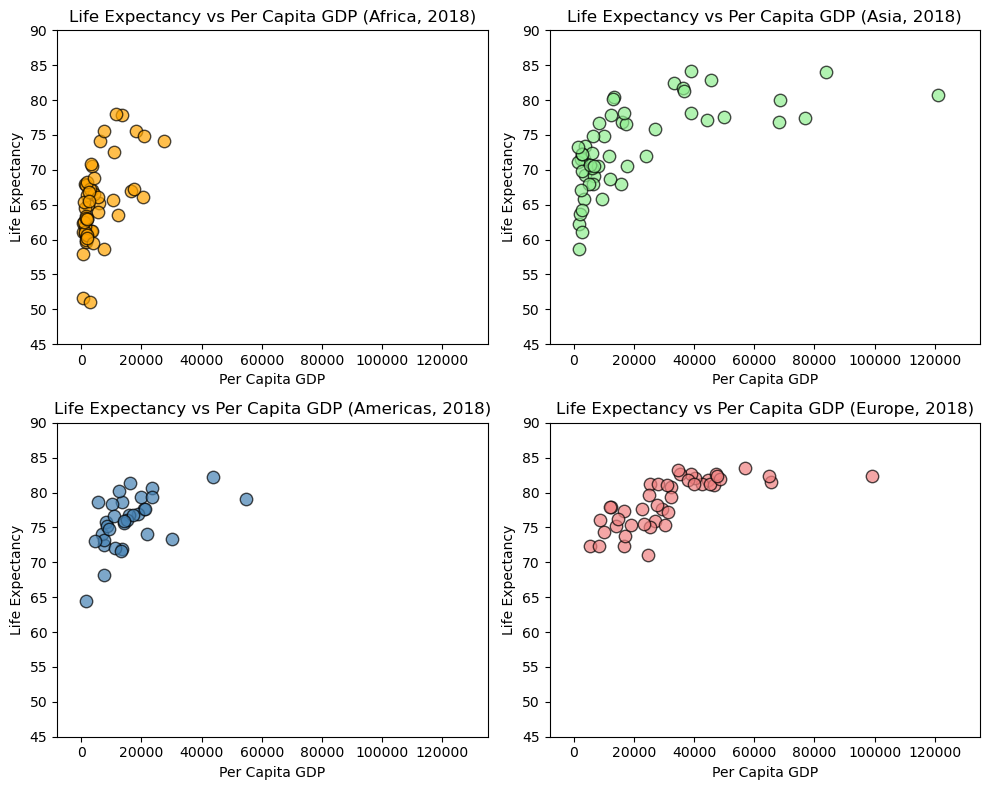

In [16]:
continent_list = ['africa', 'asia', 'americas', 'europe']
color_list = ['orange', 'lightgreen', 'steelblue', 'lightcoral']

plt.figure(figsize=[10,8])
for i in range(0, len(continent_list)):
    
    plt.subplot(2,2,i+1)
    
    current_continent = continent_list[i]
    temp_pcgdp = [pcgdp[i] for i in range(n) if continent[i] == current_continent]
    temp_life_exp = [life_exp[i] for i in range(n) if continent[i] == current_continent]
    
    plt.scatter(x=temp_pcgdp, y=temp_life_exp, s=80, alpha=0.7,
                color=color_list[i], edgecolor='black')

    plt.xlim([-8000, 135000])
    plt.ylim([45, 90])
    plt.xlabel('Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title('Life Expectancy vs Per Capita GDP (' + current_continent.title() + ', 2018)')

plt.tight_layout()
plt.show()

## Line Plots

We can use the `plot()` function in Matplotlib to create simple line plots. We will illustrate the use of this function by creating plots illustration the percentage growth in the populations of several countries over the last decade. The cell below creates lists containing our data. 

In [17]:
year_range = list(range(2009, 2019))
China = [0.49, 0.48, 0.48, 0.5, 0.49, 0.52, 0.5, 0.59, 0.53, 0.38]
Germany = [-0.27, -0.24, -0.53, 0.14, 0.24, 0.31, 0.53, 1.21, 0.41, 0.4]
Greece = [0.27, 0.27, 0, -0.27, -0.81, -0.64, -0.64, -0.74, -0.09, -0.28]
India = [1.39, 1.7, 2.07, 0.23, 0.84, 1.25, 1.22, 1.19, 1.15, 1.12]
Japan = [-0.14, 0.43, -0.2, -0.22, -0.17, -0.17, 0.02, -0.13, -0.17, -0.36]
United_States = [0.88, 0.83, 0.73, 0.73, 0.7, 0.74, 0.74, 0.73, 0.64, 0.62]

In the cell below, we plot the data for China.

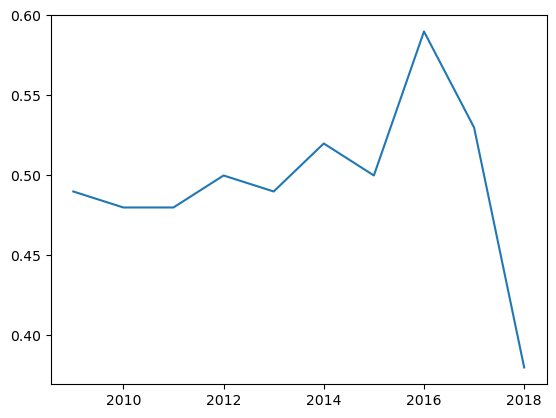

In [19]:
plt.plot(year_range, China)
# plt.scatter(year_range, China)
plt.show()

## Line Plot Parameters

We can use the `ls` parameter to specify a linestyle for the plot. We can use `lw` to specify the line width. As with `scatter()`, the parameter `color` can be used to select a color.

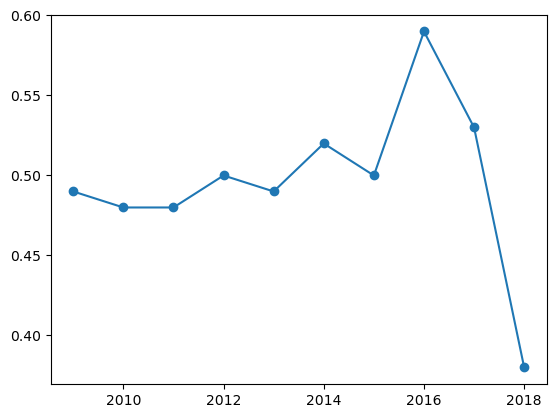

In [42]:
# plt.plot(year_range, China, lw=2, ls='--', color='magenta')
plt.plot(year_range, China, '-o')
plt.show()

If we are adding multiple plots to a figure and don't specify the colors, Matplotlib will select colors for us. 

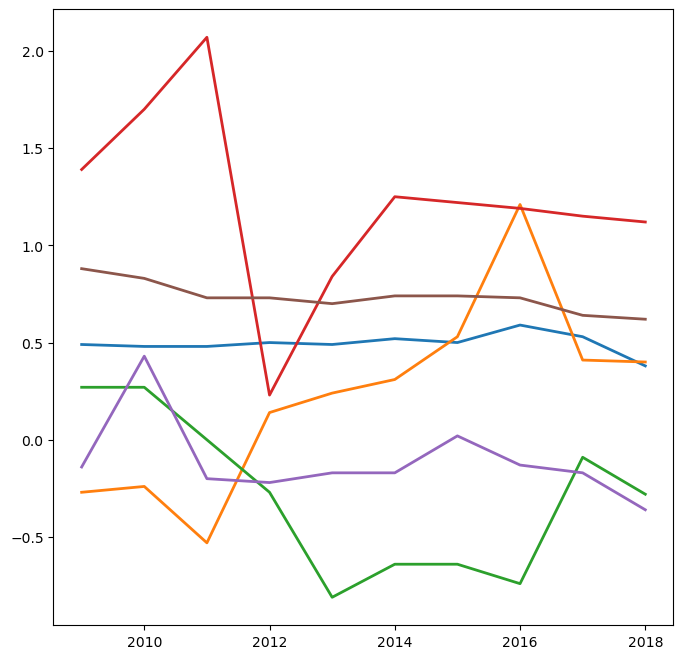

In [43]:
plt.figure(figsize=[8,8])

plt.plot(year_range, China, lw=2, label='China')
plt.plot(year_range, Germany, lw=2, label='Germany')
plt.plot(year_range, Greece, lw=2, label='Greece')
plt.plot(year_range, India, lw=2, label='India')
plt.plot(year_range, Japan, lw=2, label='Japan')
plt.plot(year_range, United_States, lw=2, label='United States')

# plt.plot([2009, 2018], [0,0], ls='--', color='black')

# plt.legend()
# plt.xlabel('Year')
# plt.ylabel('Population Growth (in %)')
# plt.title('Population Growth by Year')
# plt.show()

## Bar Charts

We can use the `bar()` function to create bar charts in Matplotlib. When creating a bar chart, we must provide values for two pararamtes: `x` and `height`. The parameter `x` should be a list (or list-like object) that contains the labels to be displayed under each bar. The `height` parameter should be a list-like object that contains the desired heights for the bars. We can use the optional `color` and `edgecolor` parameters to set the fill and border colors of the bars. 

A simple example of a bar chart is provided below.

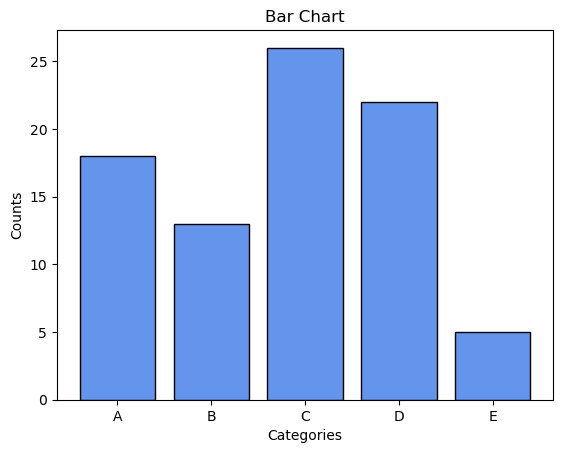

In [22]:
labels = ['A', 'B', 'C', 'D', 'E']
heights = [18, 13, 26, 22, 5]

plt.bar(x=labels, height=heights, color='cornflowerblue', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Bar Chart')
plt.show()

## Proportional Bar Charts

The heights of the bars in a bar chart can be floats as well as ints. In the example below, we divide each of the heights by the sum of the heights. We then use this to crate a bar chart that represents proprotions, rather than counts. The heights of the bars in this chart will sum to 1. 

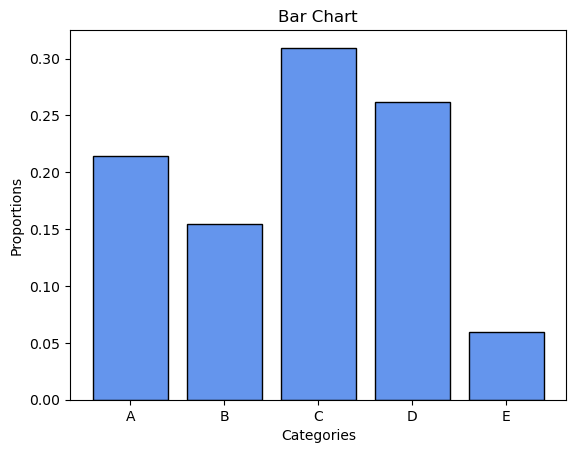

In [23]:
total = sum(heights)
props = []
for h in heights:
    props.append(h / total)

plt.bar(x=labels, height=props, color='cornflowerblue', edgecolor='black')
plt.xlabel('Categories')
plt.ylabel('Proportions')
plt.title('Bar Chart')
plt.show()

## Stacked Bar Charts

Assume that we have a dataset in which the observations can be grouped together into categories according to two (or more) different categorical variables. Suppose we would like to know the distributions of one of these categorical variables within the groups defined by a seperate categorical variable. A **stacked bar chart** is a convenient visualization for representing this type of information. A stocked bar chart can be created by setting the `bottom` argument of any bars in the chart that you do not want to be based at 0. 

The example below shows an example of creating a stacked bar chart. Notice that we have also set the `bbox_to_anchor` parameter of `plt.legend()`. This allows us to reposition the legened, and even to move it outside of the bounding box for the plot. 

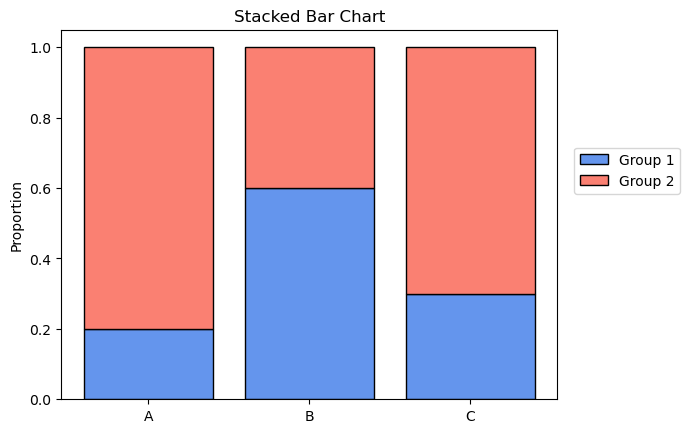

In [34]:
labels = ['A', 'B', 'C']

prop_1 = [0.2, 0.6, 0.3]
prop_2 = [0.8, 0.4, 0.7]

plt.bar(labels, prop_1, label='Group 1', color='cornflowerblue', edgecolor='black')
plt.bar(labels, prop_2, label='Group 2', color='Salmon', edgecolor='black', bottom=prop_1)

plt.legend(bbox_to_anchor=(1.02, 0.7))
plt.ylabel('Proportion')
plt.title('Stacked Bar Chart')
plt.show()

We will now work on creating a stacked bar chart displaying the proportion of countries in each continential region that have a life expectancy less than, or greater than, 70 years. We start by creating lists containing the desired proportions. This is accomplished in the following cell. 

In [27]:
continent_list = ['africa', 'americas', 'asia', 'europe']

prop_life_exp_under_70 = []
prop_life_exp_over_70 = []

for cont in continent_list:
       
    count_total = 0
    count_low_life_exp = 0
    
    for i in range(len(country)):
        if continent[i] == cont:
            count_total += 1
            if life_exp[i] < 70:
                count_low_life_exp += 1
                
    prop = count_low_life_exp / count_total

    prop_life_exp_under_70.append(prop)
    prop_life_exp_over_70.append(1 - prop)
    
print(prop_life_exp_under_70)
print(prop_life_exp_over_70)

[0.8148148148148148, 0.06060606060606061, 0.2830188679245283, 0.0]
[0.18518518518518523, 0.9393939393939394, 0.7169811320754718, 1.0]


We will now create a stack bar chart to visually represent the information contained in the lists above. 

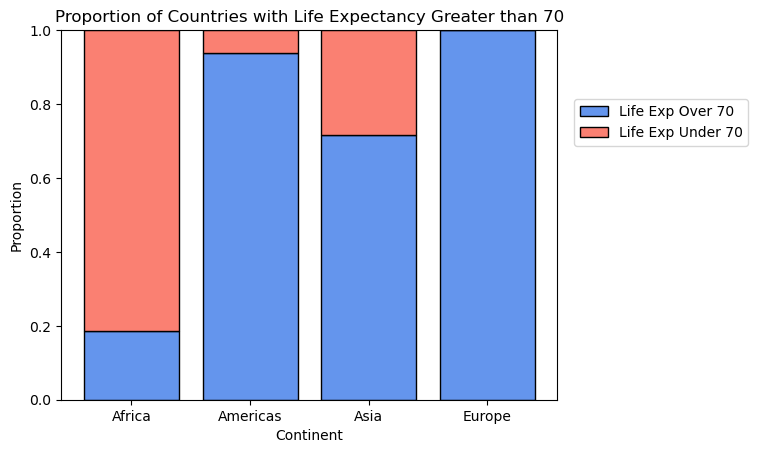

In [28]:
continent_list_cap = [c.title() for c in continent_list]

plt.bar(continent_list_cap, prop_life_exp_over_70, label='Life Exp Over 70', 
        color='cornflowerblue', edgecolor='black')

plt.bar(continent_list_cap, prop_life_exp_under_70, label='Life Exp Under 70', 
        bottom=prop_life_exp_over_70, color='Salmon', edgecolor='black')

plt.legend(loc="center left", bbox_to_anchor=(1.02,0.75))
plt.xlabel('Continent')
plt.ylabel('Proportion')
plt.title('Proportion of Countries with Life Expectancy Greater than 70')
plt.show()

## Histograms

A **histogram** is similar to a bar chart, but is use to represent continuous data rather than categorical data. A histogram is created from a sample by dividing the range occupied by values within that sample into smaller subintervals, or **bins**. Each bin has a bar associated with it. The height of a particular bar is determined by the number of observations that fall within that bin. 

We can use `plt.hist()` to create histograms. The only required parameter for `hist()` is `x`, which should be a list-like object containing values representing a sample. Matplotlib will attempt to automatically determined a reasonable number of bins to use, but we will typically want to set this ourselves using the optional `bins` parameter. The `hist()` function also has optional `edgecolor` and `color` parameters that perform the same functions as in `bar`. 

In the example below, we create a histogram with 15 bins to display the distribution of values in `life_exp`. 

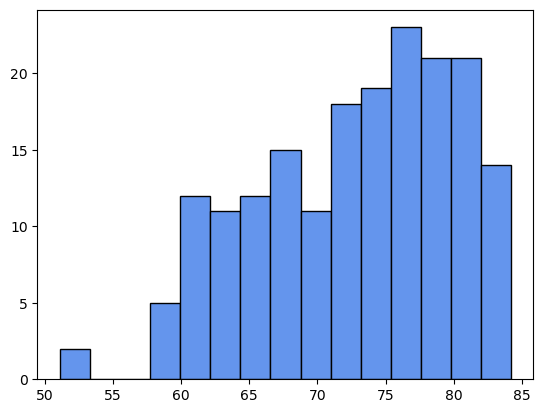

In [35]:
plt.hist(life_exp, edgecolor='black', color='cornflowerblue', bins=15)
plt.show()

As shown above, we can set the `bins` parameter to an integer to specify the number of bins that we would like to use. Alternately, we can provide this parameter with a list of numbers identifying the values use to define the bins. We show an example of this in the cell below. 

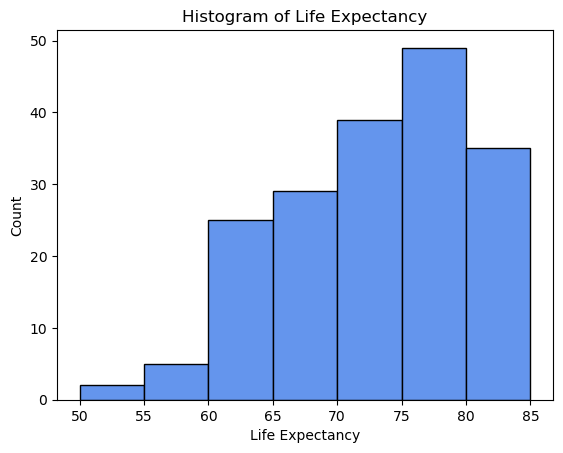

In [36]:
plt.hist(life_exp, edgecolor='k', color='cornflowerblue', 
         bins=[50, 55, 60, 65, 70, 75, 80, 85])
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.show()

In the example below, we use `subplot()` to display a two histograms. One shows the distribution for life expectancy in 2018, while the other shows the distribution of per capita GDP in 2018.

In [ ]:
plt.figure(figsize=[12,4])

plt.subplot(1, 2, 1)
plt.hist(life_exp, edgecolor='k', color='cornflowerblue', 
         bins=[50, 55, 60, 65, 70, 75, 80, 85])
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(pcgdp, edgecolor='k', color='salmon', 
         bins=10)
plt.title('Histogram of Per Capita GDP')
plt.xlabel('Per Capita GDP')
plt.ylabel('Count')

plt.show()